In [2]:
from scipy.stats import expon as ex
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ЗАДАЧА 1

In [23]:
n = 70
ar_t = ex(scale = 1/3).rvs(size = n)
arrival_times = []
win_proc = []
for i in range(n):
    a = sps.norm(scale=ar_t[i]).rvs(size = 1)
    if i == 0:
        arrival_times.append(ar_t[i])
        win_proc.append( a )
    else:
        arrival_times.append(ar_t[i]+arrival_times[i-1])
        win_proc.append(win_proc[i-1]+a)

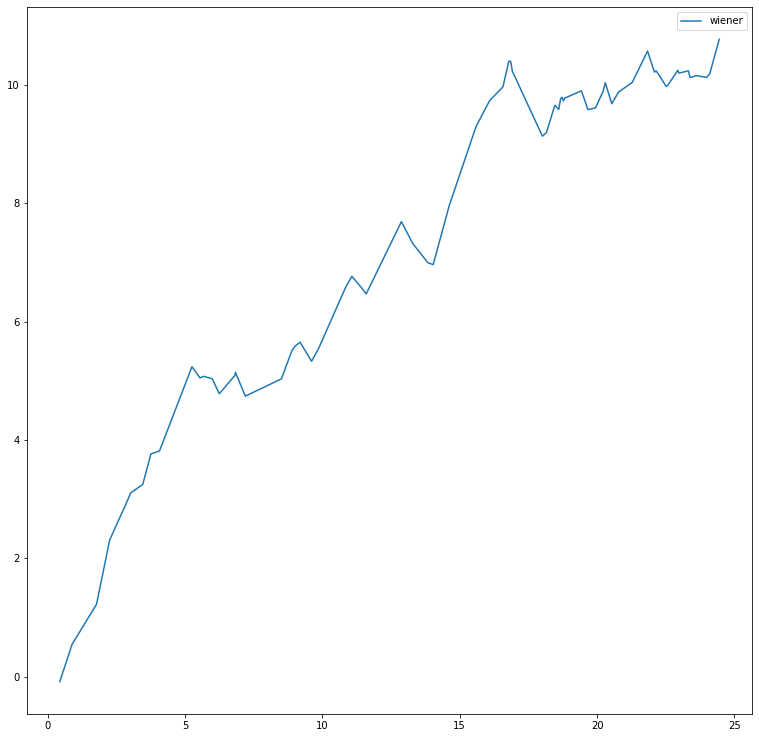

In [24]:
plt.figure(figsize = (13,13))
plt.plot(arrival_times,win_proc,label = 'wiener')
plt.legend()
plt.show()

# ЗАДАЧА 2

In [34]:
a = np.linspace(0,21,23)
b1 = 22

In [35]:
n = 200
m = 300
k = 0
a_ar = []
b_ar = []
ef = []
for a1 in a:
    k = 0
    for j in range(m):
        i1 = 0
        i2 = 0
        ar_t = ex(scale = 1/3).rvs(size = n)
        arrival_times = []
        win_proc = []
        c = 0
        for i in range(n):
            aa = sps.norm(scale=ar_t[i]).rvs(size = 1)
            if i == 0:
                arrival_times.append(ar_t[i])
                win_proc.append(aa)
            else:
                arrival_times.append(ar_t[i]+arrival_times[i-1])
                win_proc.append(win_proc[i-1]+aa)
            if arrival_times[i] > b1:
                break
            if arrival_times[i] > a1:    
                if ((win_proc[i] > 0) and (win_proc[i-1] < 0)) or ((win_proc[i] < 0) and (win_proc[i-1] > 0)):
                    k += 1
                    break
    ef.append(1-k/m)

In [36]:
ef

[0.1166666666666667,
 0.15333333333333332,
 0.2866666666666666,
 0.30666666666666664,
 0.3433333333333334,
 0.4,
 0.3833333333333333,
 0.43333333333333335,
 0.47,
 0.5166666666666666,
 0.5566666666666666,
 0.5800000000000001,
 0.5800000000000001,
 0.61,
 0.6433333333333333,
 0.6333333333333333,
 0.71,
 0.7166666666666667,
 0.7233333333333334,
 0.7966666666666666,
 0.86,
 0.8633333333333333,
 0.9299999999999999]

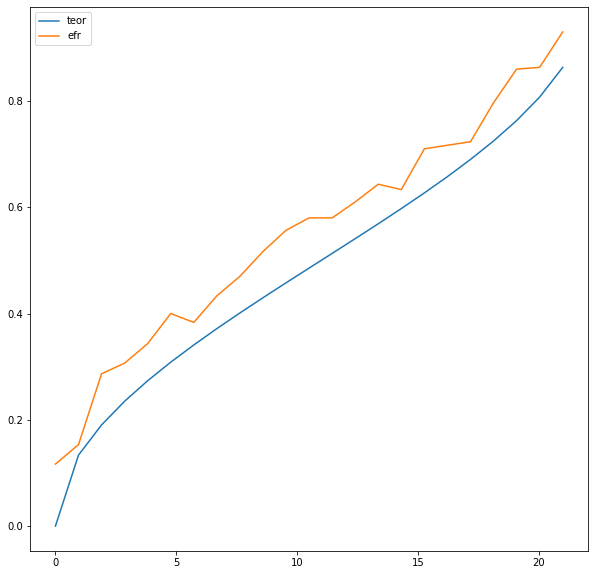

In [37]:
import math
a = np.array(a)
fff = 1. - (2. / math.pi) * np.arccos(np.sqrt(a/b1))
plt.figure(figsize = (10,10))
plt.plot(a,fff,label = 'teor')
plt.plot(a,ef,label = 'efr')
plt.legend()
plt.show()

# Задача 3

In [12]:
n = 100
ar_t = ex(scale = 1/10).rvs(size = n)
arrival_times = []
win_proc = []
for i in range(n):
    if i == 0:
        a = sps.norm(scale=ar_t[i]).rvs(size = 1)
    else:
        if arrival_times[i-1] > 1:
            a = sps.norm(scale=ar_t[i]).rvs(size = 1) + ar_t[i]*sps.norm(scale=1/ar_t[i]).rvs(size = 1) - sps.norm(scale=1).rvs(size = 1)
        else:
            a = sps.norm(scale=ar_t[i]).rvs(size = 1)
    if i == 0:
        arrival_times.append(ar_t[i])
        win_proc.append(a)
    else:
        arrival_times.append(ar_t[i]+arrival_times[i-1])
        win_proc.append(win_proc[i-1]+a)

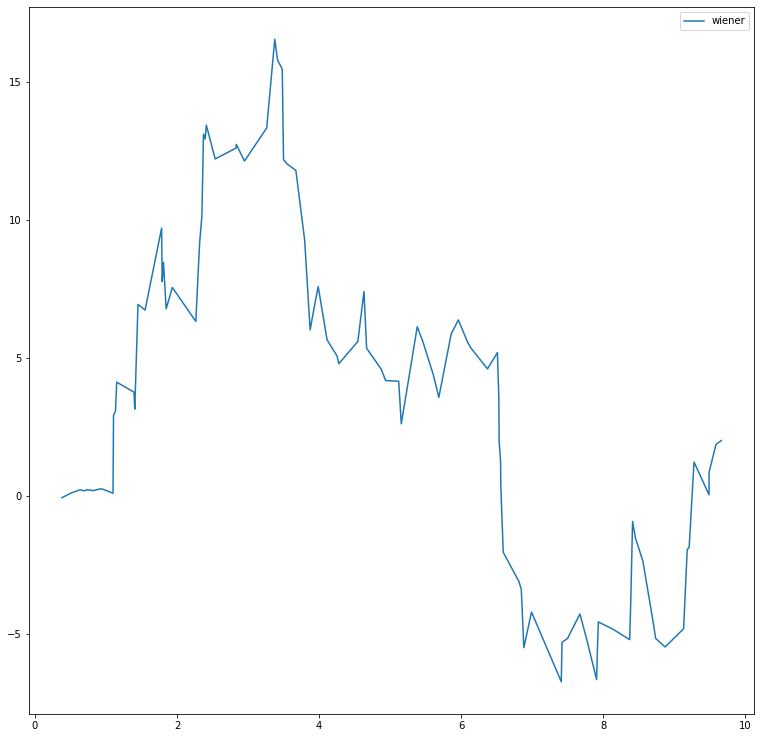

In [13]:
plt.figure(figsize = (13,13))
plt.plot(arrival_times,win_proc,label = 'wiener')
plt.legend()
plt.show()